<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/1124(%EA%B8%88)_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch4_1~3_pg_142_~_181_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1124(금) 과제_파이썬 딥러닝 텐서플로 ch4. 1~3 pg. 142 ~ 181 필사
### 2129014 박지현

# PART 04. 합성곱 신경망(CNN)

## PART 04.01. 합성곱 신경망(CNN: Convolutional Neural Network)
- 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
- 컴퓨터 비전 분야에서 많이 사용됨: 대표적으로, 이미지 분류, 객체 탐지, 스타일 전이 등

- ex. 이미지 분류 사례 : 이미지를 인식할 수 있는 능력을 모델이 갖추게 함(고양이 or 강아지 분류)

- ex. 객체 탐지 사례 : 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술
 - 경계 박스(bounding box, 타겟 이미지에 표시된 노란색 실선, 일반적으로 이미지의 좌표 값 > 회귀분석으로 해결됨) 찾음 > 인식한 객체가 어떤 클래스에 속하는지(>분류 문제) 분류확률과 예측을 함께 알려줌

- ex. 스타일 전이: 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술

### 1-1. 이미지 표현
이미지 또는 영상을 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함

- ex. 아래의 흑백 손글씨 이미지 : 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현 가능
 - 숫자 0: 완전히 검은 색 / 숫자 255: 흰색 / 그 중간: 회색
 - 화소를 나타내는 숫자 = 이미지의 강도, 숫자가 클수록 더 강한 특성을 나타냄

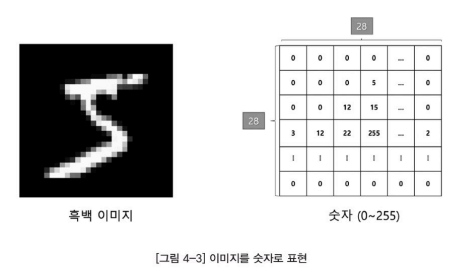

- ex. 아래의 컬러 이미지 : R(빨강), G(초록), B(파랑)로 구성된 3장의 이미지를 겹쳐서 표현함
 - 각 채널의 이미지: 0~255 사이의 숫자, 숫자가 클수록 해당 색상을 더 강하게 표현함
 - 채널은 각각이 하나의 이미지로 구분됨, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현하는 방식

 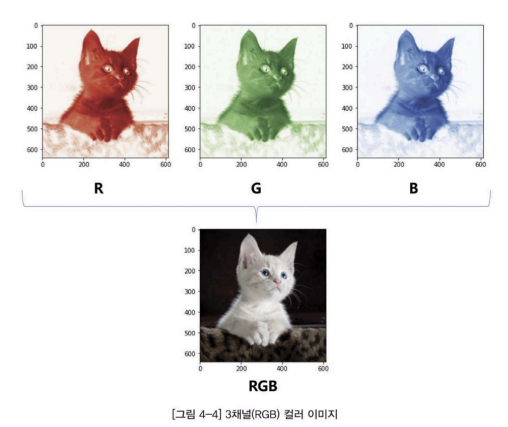

### 1-2. 합성곱(Convolution)
합성곱 연산 : 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
- 특성맵(feature map): 합성곱 연산을 통해서 추출된 이미지
 - 이렇게 추출된 특성맴을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임
 - 입력 이미지(shape: 세로, 가로)의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영 > 이렇게 겹치는 부분에 대하여 합성곱 연산을 수행


ex. 이미지에 필터를 적용하는 합성곱 연산의 순서
1. 3 * 3 사이즈를 가지는 커널이 첫 좌측 상단의 이미지의 3 * 3 부분과 매칭되어 합성복 연산 수행 후 모두 더함 > 단일 스칼라 값
2. 합성곱 연산 수행 후 모두 더한 값으로 단일 스칼라 값 나옴 > feature map의 촤측 상단의 첫 번쨰 값이 됨
3. 3 * 3 커널 사이즈 > 총 9개의 가중치(weight)를 가지며 오차 역전파(back propagation)시 커널의 가중치 업데이트함
(오차 역전파 시 커널 그래티덩트 계산할 때 9개에 대해서만 업데이트 필요>완전 연결층을 사용할 때보다 연산량이 훨씬 적음/효율적임)

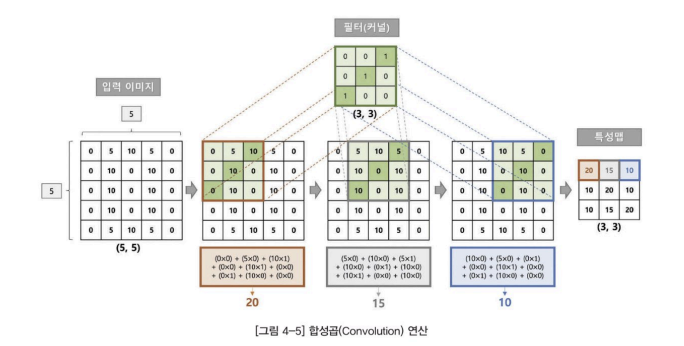



### 1-3. 채널(channel)
: 입력 이미지를 구성하는 2차원 배열의 개수
- 흑백 이미지 : 단일 채널(=채널의 개수가 1개인 이미지)
- 컬러 이미지 : R, G, B 3개의 채널을 가지는 이미지(>이미지 3장 겹쳐서 컬러 이미지로 표현됨)
 - ex. 세로 5픽셀, 가로 5픽셀의 컬러 이미지의 shape: (5,5,3)

- 입력 이미지가 여러 개의 채널을 갖는 경우의 합성곱 연산 수행할 때 특성맵의 생성 과정
1. 입력 이미지의 채널 개수만큼 커널 생성
2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행하기
> 입력 이미지의 채널 개수만큼 합성곱 연산된 결과 생성
3. element-wise 덧셈 연산으로 모두 더해주기 > 최종 특성맵 생성

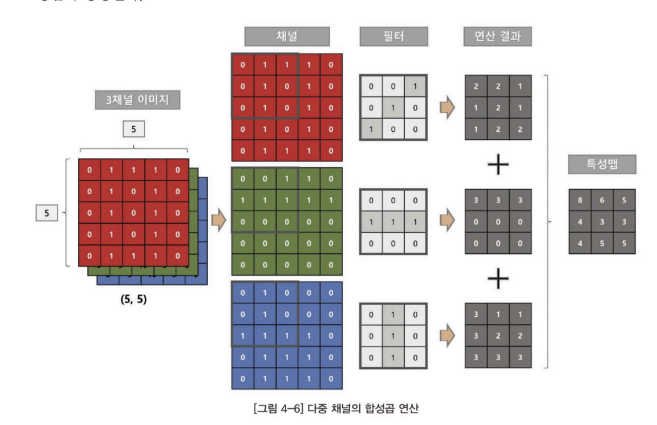


ex. 합성곱 레이어에 출력 필터의 개수를 20개로 설정 시,
 - 입력 이미지의 채널 개수 3개 * 출력 필터의 개수 20개 = 총 60개의 커널 생성됨
 - 1개의 커널 사이즈 3 * 3 > (3 * 3 * 입력 채널 수 * 출력 필터 수) = 3 * 3 * 3개(R,G,B) * 20개(출력 필터 수) = 540개
 > 즉, 해당 층에서 업데이트 할 가중치의 그래디언트: 540개 + bias: 20개의 출력 필터 개수
 = 총 560개의 파라미터가 업데이트될 파라미터

### 1-4. 스트라이드(stride)
스트라이드(stride) : 커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 학성곱 연산을 수행하고 특성맵에 결과를 채워나갈 떄, 이동하는 간격
- 주로 1 or 2로 설정
- 정해진 스트라이드 만큼 우측으로 이동하기 > 우측으로 끝까지 이동 후 아래 방향으로 1칸 좌측 첫 번째 픽셀로 이동하여 추출
- 2로 설정 시, 2픽셀씩 건너뜀 > 특성맵의 크기가 1/2로 줄어듬
- 텐서플로 케라스에서 제공하는 Conv2D 레이어의 strides 매개변수에 스트라이드 지정 가능

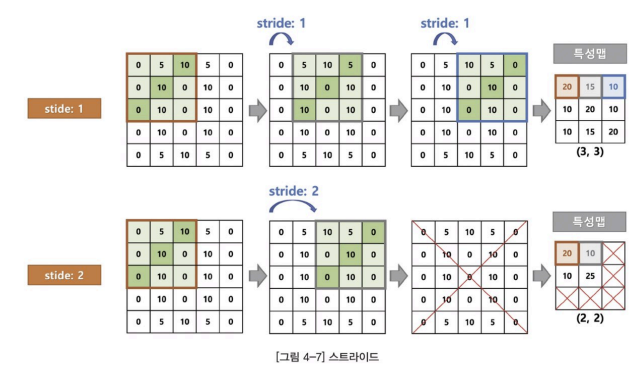



### 1-5. 패딩(padding)
특성맵을 추출하는 과정에서, 스트라이드에서 1로 설정하게 되는 경우에도 입력 이미지 대비 크기가 줄어들게 됨
> 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 **패딩(padding)** 설정 가능

- 일반적으로 zero-padding 사용 : 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출하게 됨
 - 패딩 적용 후 합성곱 연산을 수행하게 되면, 특성맵의 크기가 줄어들지 X
 - 텐서플로 케라스의 Covn2D 레이어에서 padding = 'same'으로 설정 시, zero-padding을 적용 (기본값: padding = 'valid'

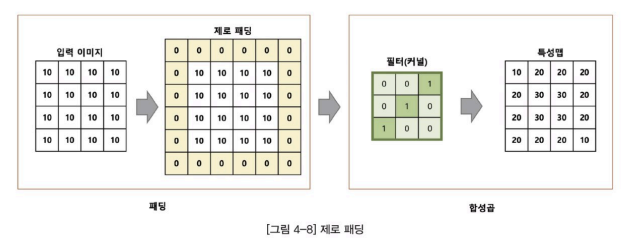

### 1-6. 특성맵(feature map) 사이즈
- 패딩과 스트라이드 적용하고, 입력 데이터와 필터의 크기가 주어졌을 떄 출력 데이터의 크기 구하는 식

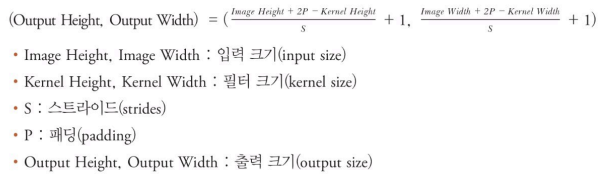

### 1-7. 풀링(pooling)
풀링(pooling) 레이어 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 장점
1. 이미지 축소를 통해 연산량을 감소
2. 과대적합(overfitting)을 방지함
- 풀링 레이어의 종류
1. 최대 풀링(max pooling) : 커널 크기의 픽셀들의 최댓값이 출력 값으로 모아져서 나옴, 좋은 성능 > 합성곱 신경망과 같이 주로 사용됨
2. 평균 풀링(average pooling) : 커널 크기의 픽셀들의 평균 값이 출력 값으로 모아져서 나옴

- 풀링 레이어 또한 스트라이드 값을 가짐
 - ex. 스트라이드=2 일 시, 입력 이미지 대비 총 1/4로 줄어듬

 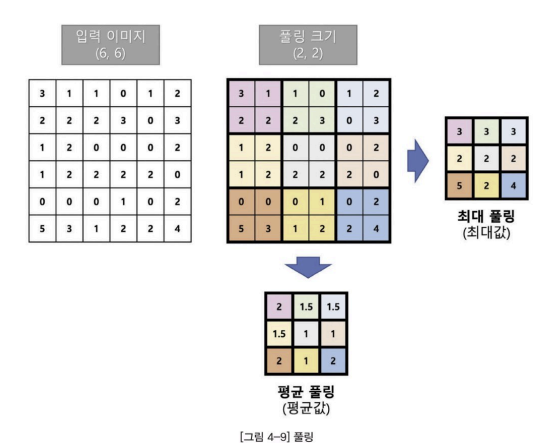


## PART 04.02. 간단한 모델 생성
- mnist 손글씨 데이터셋 가지고, 간단한 구조의 합성곱 신경망 모델 만들어보기

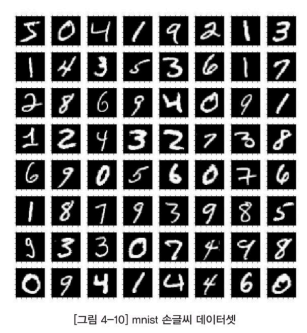

### 2-1. 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


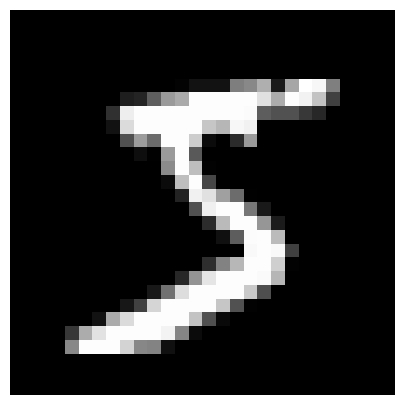

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis('off')
    plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2. Sequential API로 모델 생성 및 학습

- CNN 모델 구조

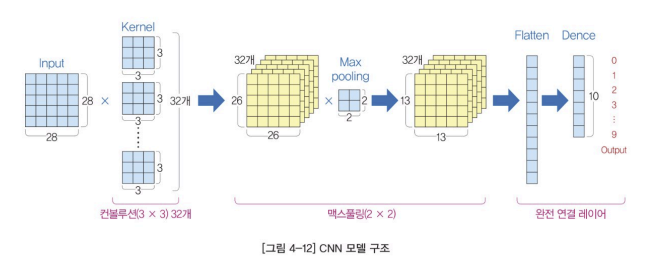

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2045 - accuracy: 0.9419 - val_loss: 0.0829 - val_accuracy: 0.9747
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0768 - accuracy: 0.9776 - val_loss: 0.0627 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0557 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0490 - accuracy: 0.9852 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0555 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0510 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0509 - val

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0595 - accuracy: 0.9829


[0.059456318616867065, 0.9829000234603882]

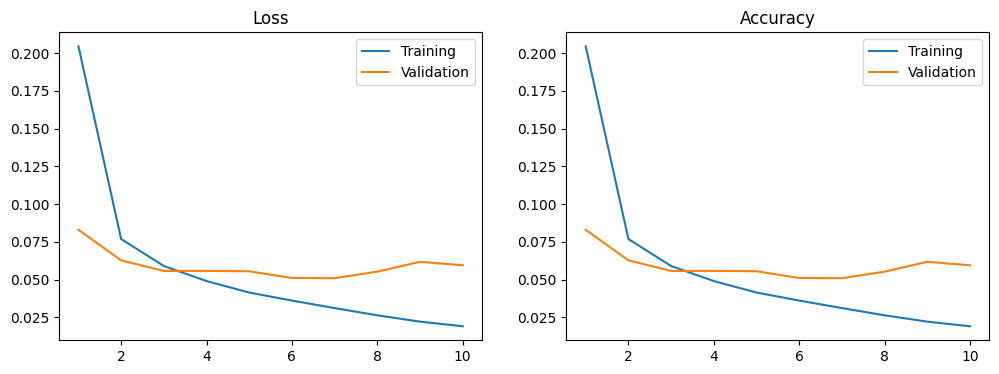

In [10]:
def plot_loss_acc(history, epoch):
    loss, val_loss=history.history['loss'], history.history['val_loss']
    acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

    fig, axes=plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch+1), loss, label='Training')
    axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), loss, label='Training')
    axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

### 2-3. 모델 구조 파악

- 합성곱 신경망 구조

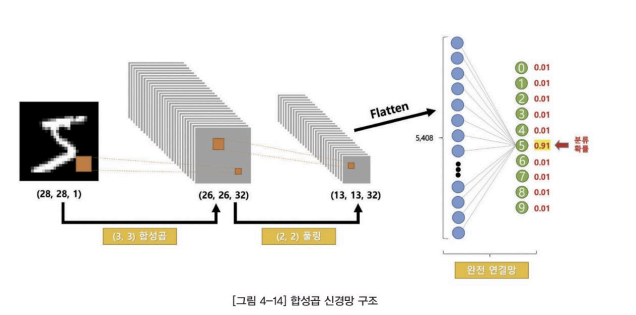

In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
# 레이어
model.layers

In [15]:
# 첫 번째 레이어 선택
model.layers[0]

In [16]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫 번재 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.9391322 , -0.60572624, -0.62947935,  0.14993075,
            0.22338474,  0.50856704, -0.49246827,  0.01580618,
            0.21380192, -0.23100056, -0.40842053,  0.33447692,
            0.20407511, -0.5873088 ,  0.27061808, -0.2658988 ,
            0.6522092 , -0.11023405, -0.37378627, -1.1038836 ,
           -0.9257984 , -0.4254437 ,  0.25094107, -0.6258048 ,
           -0.2000823 ,  0.18849474, -0.13505569, -0.57394886,
           -0.5661252 ,  0.5754851 ,  0.29021037,  0.23503599]],
 
         [[ 0.1857364 , -0.6551881 , -0.6696233 ,  0.33498022,
            0.37657896,  0.172395  , -0.20231073, -0.23908225,
           -0.42559662,  0.229782  , -0.18144362,  0.3180117 ,
            0.43132728, -0.43045107, -0.46108136,  0.00160394,
            0.47978088,  0.2664356 ,  0.13431904, -0.2719057 ,
           -0.6869089 ,  0.24878752,  0.30183882,  0.09681002,
            0.65228766,  0.42990884,  0.13

In [19]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.9391322 , -0.60572624, -0.62947935,  0.14993075,
           0.22338474,  0.50856704, -0.49246827,  0.01580618,
           0.21380192, -0.23100056, -0.40842053,  0.33447692,
           0.20407511, -0.5873088 ,  0.27061808, -0.2658988 ,
           0.6522092 , -0.11023405, -0.37378627, -1.1038836 ,
          -0.9257984 , -0.4254437 ,  0.25094107, -0.6258048 ,
          -0.2000823 ,  0.18849474, -0.13505569, -0.57394886,
          -0.5661252 ,  0.5754851 ,  0.29021037,  0.23503599]],

        [[ 0.1857364 , -0.6551881 , -0.6696233 ,  0.33498022,
           0.37657896,  0.172395  , -0.20231073, -0.23908225,
          -0.42559662,  0.229782  , -0.18144362,  0.3180117 ,
           0.43132728, -0.43045107, -0.46108136,  0.00160394,
           0.47978088,  0.2664356 ,  0.13431904, -0.2719057 ,
          -0.6869089 ,  0.24878752,  0.30183882,  0.09681002,
           0.65228766,  0.42990884,  0.13522755, -0.417937

In [20]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00445449, -0.03424872, -0.00671252, -0.16127726, -0.14977631,
        0.01342919, -0.20221043, -0.08329096, -0.35295454, -0.26072714,
       -0.32975242, -0.27778527, -0.00160804, -0.19987492, -0.20840156,
       -0.2220013 ,  0.20245458, -0.28992623, -0.14557084, -0.01577774,
       -0.01175493, -0.13956922, -0.20796211, -0.13550565, -0.00499365,
       -0.10956062, -0.24369185, -0.11261024, -0.3168816 , -0.0107864 ,
       -0.2554475 , -0.20055725], dtype=float32)>

In [21]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator=tf.keras.Model(inputs=model.input,
                         outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 58ms/step


2

In [23]:
# 첫 번재 레이어 conv의 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

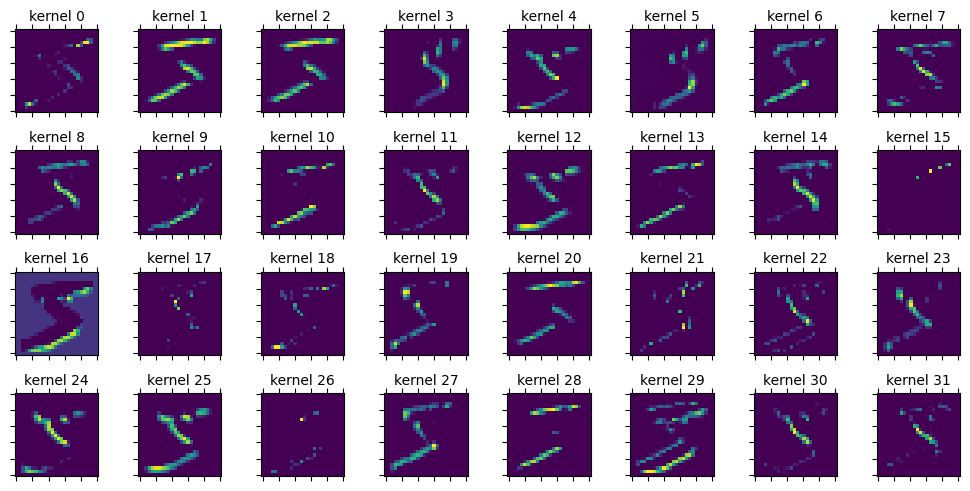

In [24]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [25]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


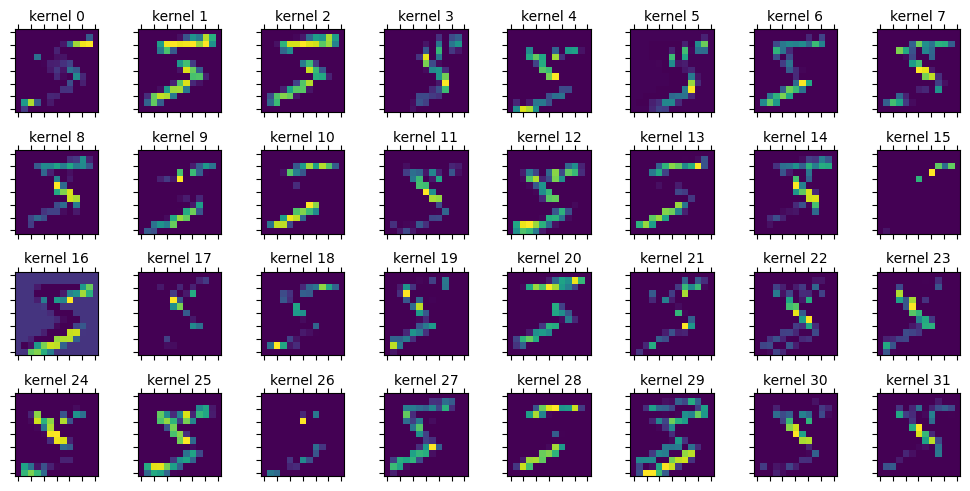

In [26]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## PART 04.03. 복잡한 모델 생성


### 3-1. 데이터셋 준비

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [29]:
# 새로운 출력 값 배열 생성(홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
    if y%2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
# 홀수 짝수 여부가 잘 정리된 것을 확인 가능
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
    if y%2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [32]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2. Functional API로 다중 입력, 다중 출력 레이어 생성

In [33]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

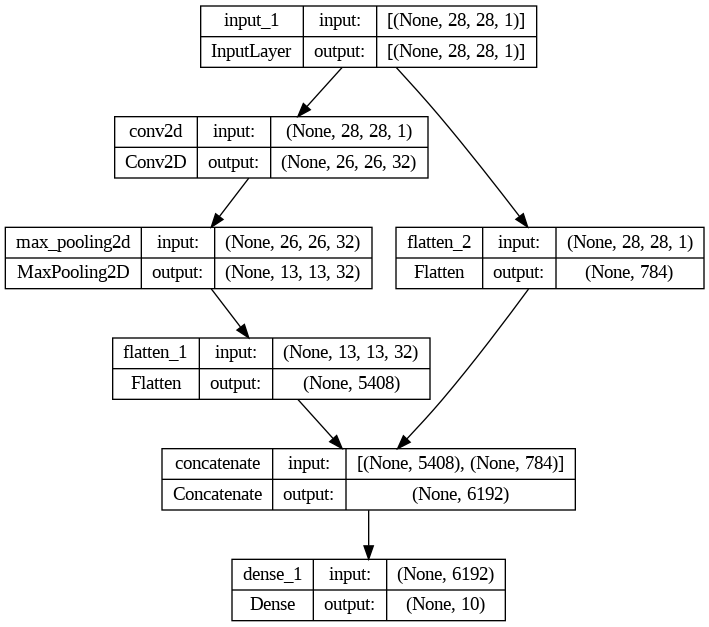

In [41]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [42]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train,
                  validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2093 - accuracy: 0.9393 - val_loss: 0.0974 - val_accuracy: 0.9702
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0788 - accuracy: 0.9770 - val_loss: 0.0722 - val_accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0696 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0586 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0579 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0567 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0651 - val_ac

### 3-3. 다중 출력 분류 모델

- 다중 출력의 과정

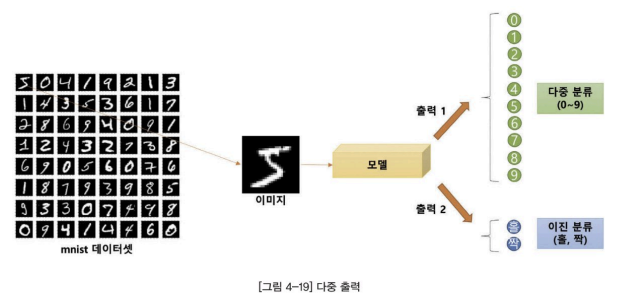

In [43]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [44]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


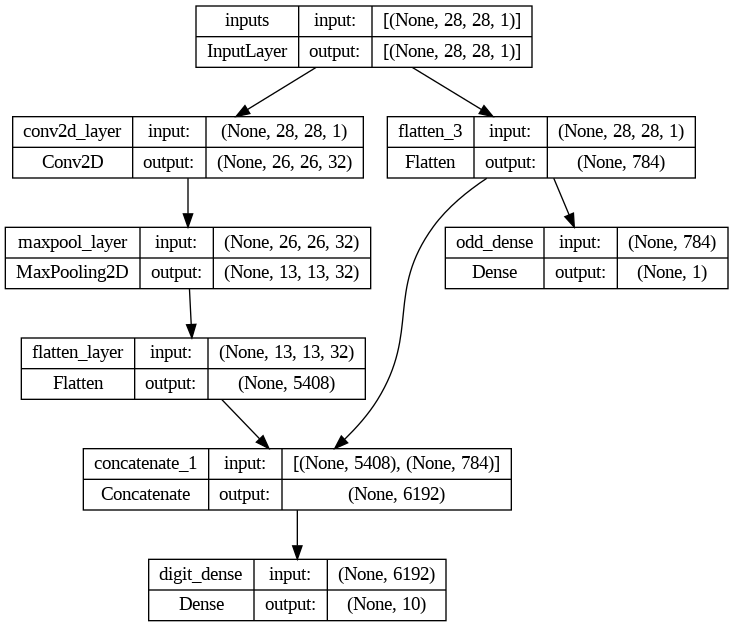

In [45]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [46]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense': 'sparse_categorical_crossentropy',
                                      'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,
                                                            'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3822 - digit_dense_loss: 0.2205 - odd_dense_loss: 0.3234 - digit_dense_accuracy: 0.9370 - odd_dense_accuracy: 0.8658 - val_loss: 0.2342 - val_digit_dense_loss: 0.0964 - val_odd_dense_loss: 0.2756 - val_digit_dense_accuracy: 0.9724 - val_odd_dense_accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2209 - digit_dense_loss: 0.0851 - odd_dense_loss: 0.2716 - digit_dense_accuracy: 0.9755 - odd_dense_accuracy: 0.8912 - val_loss: 0.2046 - val_digit_dense_loss: 0.0718 - val_odd_dense_loss: 0.2656 - val_digit_dense_accuracy: 0.9772 - val_odd_dense_accuracy: 0.8944
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1939 - digit_dense_loss: 0.0625 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9815 - odd_dense_accuracy: 0.8954 - val_loss: 0.1940 - val_digit_dense_loss: 0.0637 - val_odd_dense_loss: 0.2606 - val_digit_dense_accuracy: 0.9801 - va

In [47]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 3ms/step - loss: 0.1887 - digit_dense_loss: 0.0608 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9818 - odd_dense_accuracy: 0.8999


[0.18865185976028442,
 0.060814838856458664,
 0.25567421317100525,
 0.9818000197410583,
 0.8999000191688538]

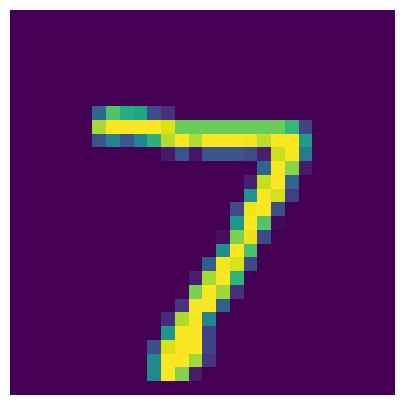

In [48]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis('off')
    plt.show()

plot_image(x_valid, 0)

In [49]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 4ms/step
[9.6124029e-12 8.6284881e-09 1.0594856e-08 9.5424537e-07 1.7627250e-11
 2.4867514e-11 1.0433599e-20 9.9999875e-01 6.5481762e-09 2.3886525e-07]
[0.999583]


In [50]:
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [51]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-51-b68f671b10f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4. 전이 학습(Transfer Learning)

In [52]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


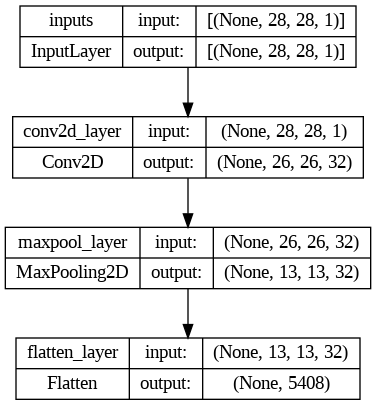

In [53]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [54]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
    ])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


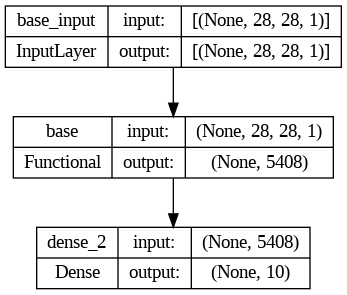

In [55]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [56]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train,
                        validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1286 - accuracy: 0.9635 - val_loss: 0.0669 - val_accuracy: 0.9783
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0547 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0531 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0516 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0534 - val_ac

In [57]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input,
                                          outputs=base_model_output,
                                          name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [58]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input,
                                         outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [59]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train, y_train,
                                 validation_data=(x_valid_in, y_valid),
                                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1155 - accuracy: 0.9696 - val_loss: 0.0548 - val_accuracy: 0.9836
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0481 - accuracy: 0.9857 - val_loss: 0.0546 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0493 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0531 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0530 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0521 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0538 - val_accuracy:

In [60]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2=tf.keras.models.Model(inputs=model.input,
                                         outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [61]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input,
                                          outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [62]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train,
                                validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1170 - accuracy: 0.9687 - val_loss: 0.0545 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0489 - accuracy: 0.9856 - val_loss: 0.0506 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0494 - val_accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0531 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.0532 - val_accuracy: